### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

### Import data

In [1]:
import pandas as pd
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

### Preprocess data

#### explore data

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.shape

(2906, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


#### address missing data

In [6]:
num_missing = data.isnull().sum()
num_missing[num_missing >0]

btc_total_bitcoins              27
btc_trade_volume                21
btc_blocks_size                 29
btc_median_confirmation_time    12
btc_difficulty                  16
btc_transaction_fees            10
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5,1,'btc_blocks_size')

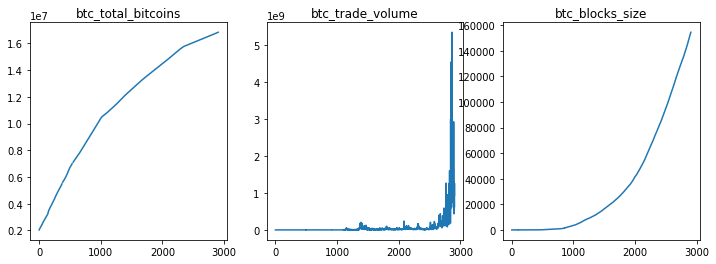

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_total_bitcoins'])
axes[0].set_title("btc_total_bitcoins")

axes[1].plot(data['btc_trade_volume'])
axes[1].set_title("btc_trade_volume")

axes[2].plot(data['btc_blocks_size'])
axes[2].set_title("btc_blocks_size")

Text(0.5,1,'btc_transaction_fees')

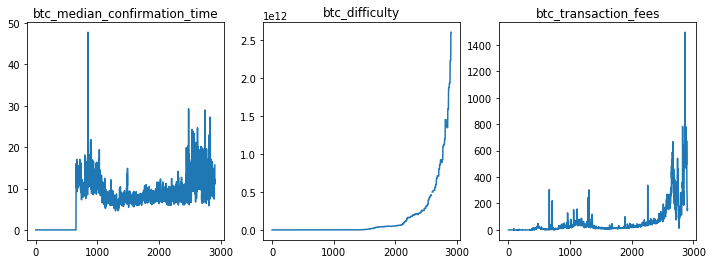

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_median_confirmation_time'])
axes[0].set_title("btc_median_confirmation_time")

axes[1].plot(data['btc_difficulty'])
axes[1].set_title("btc_difficulty")

axes[2].plot(data['btc_transaction_fees'])
axes[2].set_title("btc_transaction_fees")

In [10]:
# According to the figures above, it seems that us the function 'fillna' with the method of 'ffill' would be fine.
data_new = data.fillna(method='ffill')

#### categorical data

In [11]:
pass

#### data scaling

In [12]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data_new.drop(['Date','btc_market_price'], axis =1)
y = data_new['btc_market_price']

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Train data

In [13]:
scores = {}

#### K-neighbors regression

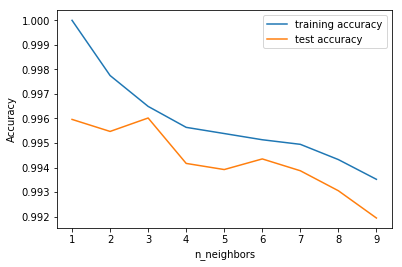

In [14]:
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbor_seetings = range(1,10)

for x in neighbor_seetings:
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))

plt.plot(neighbor_seetings, training_accuracy, label = 'training accuracy')
plt.plot(neighbor_seetings, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

In [15]:
# The best n_neighbors is 3
scores['K-neighbors regression'] = [training_accuracy[2],test_accuracy[2]]

#### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))
scores['LinearRegression']=[lr.score(X_train, y_train),lr.score(X_test,y_test)]

Train score: 0.9999556586937504
Test score: 0.9999648991545591


In [17]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr, X_train, y_train, cv = 5))

[0.99994144 0.99995913 0.99995868 0.99994664 0.99995757]


#### Ridge

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.9965559318373163
Test score: 0.994364287590398


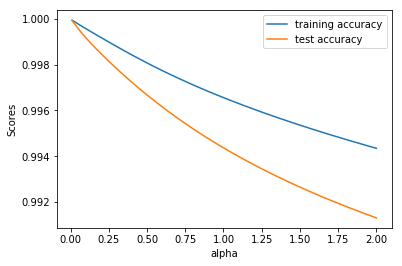

In [19]:
import numpy as np
a =np.linspace(0.01,2,1000)
training_accuracy = []
test_accuracy = []
for x in a:
    ridge = Ridge(alpha = x)
    ridge.fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test,y_test))
    
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [20]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.01, 0.1,1, 5, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 1.00


best alpha is 0.01

In [22]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)
scores['Ridge']=[ridge.score(X_train, y_train),ridge.score(X_test,y_test)]

#### Lasso

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 100000)
lasso.fit(X_train, y_train)
print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Train score: 0.9998857497412653
Test score: 0.999891461357756
Number of features used: 7


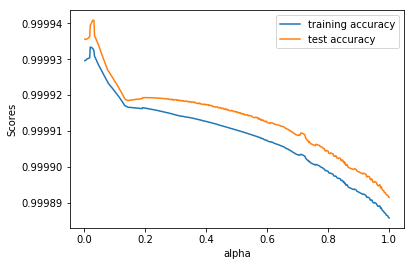

In [24]:
a =np.linspace(0.001,1,500)
training_accuracy = []
test_accuracy = []
f = []
for x in a:
    lasso = Lasso(alpha = x, max_iter = 100000)
    lasso.fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test,y_test))
    f.append(np.sum(lasso.coef_!=0))
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [25]:
lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.01,0.25, 0.5, 0.75, 1,2,5,10,15,20,25,30]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.25, 0.5, 0.75, 1, 2, 5, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 0.9999259530153336


In [27]:
lasso = Lasso(alpha = 0.01,max_iter = 100000)
lasso.fit(X_train, y_train)
scores['Lasso']=[lasso.score(X_train, y_train),lasso.score(X_test,y_test)]

#### Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Polynomial LinearRegression')
print('Train score: {}'.format(linreg.score(X_train, y_train)))
print('Test score: {}\n'.format(linreg.score(X_test,y_test)))
scores['Polynomial LinearRegression']=[linreg.score(X_train, y_train),linreg.score(X_test,y_test)]

linridge = Ridge()
linridge.fit(X_train, y_train)
print('Polynomial Ridge Regression')
print('Train score: {}'.format(linridge.score(X_train, y_train)))
print('Test score: {}'.format(linridge.score(X_test,y_test)))
scores['Polynomial Ridge Regression']=[linridge.score(X_train, y_train),linridge.score(X_test,y_test)]

Polynomial LinearRegression
Train score: 0.9999911816944306
Test score: 0.9999511258717362

Polynomial Ridge Regression
Train score: 0.9999559686982776
Test score: 0.9998815979679958


#### SVM

In [30]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [31]:
from sklearn.svm import LinearSVC
#svr = LinearSVC()
#svr.fit(X_train,y_train)

#print('Train score: {}'.format(svr.score(X_train, y_train)))
#print('Test score: {}'.format(svr.score(X_test,y_test)))
#scores['LinearSVC']=[svr.score(X_train, y_train),svr.score(X_test, y_test)]

### Cross validation

{'K-neighbors regression': [0.9964918698075922, 0.9960187568625364],
 'Lasso': [0.9999301527448757, 0.9999357250604766],
 'LinearRegression': [0.9999556586937504, 0.9999648991545591],
 'Polynomial LinearRegression': [0.9999911816944306, 0.9999511258717362],
 'Polynomial Ridge Regression': [0.9999559686982776, 0.9998815979679958],
 'Ridge': [0.999933849684315, 0.9999164113034845]}